### Predicting Youth Risk Behaviors: Modeling the YRBSS

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
%config InlineBackend.figure_format ='retina'


In [28]:
df = pd.read_csv('data/SADCQ.csv')

In [77]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504249 entries, 0 to 504248
Columns: 151 entries, sitecode to qtransgender
dtypes: float64(142), int64(6), object(3)
memory usage: 580.9+ MB


In [79]:
cols = df.columns.tolist()
cols

['sitecode',
 'sitename',
 'sitetype',
 'sitetypenum',
 'year',
 'survyear',
 'weight',
 'stratum',
 'PSU',
 'record',
 'age',
 'sex',
 'grade',
 'race4',
 'race7',
 'stheight',
 'stweight',
 'bmi',
 'bmipct',
 'qnobese',
 'qnowt',
 'q66',
 'q65',
 'sexid',
 'sexid2',
 'sexpart',
 'sexpart2',
 'q8',
 'q9',
 'q10',
 'q11',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18',
 'q19',
 'q20',
 'q21',
 'q22',
 'q23',
 'q24',
 'q25',
 'q26',
 'q27',
 'q28',
 'q29',
 'q30',
 'q31',
 'q32',
 'q33',
 'q34',
 'q35',
 'q36',
 'q37',
 'q38',
 'q39',
 'q40',
 'q41',
 'q42',
 'q43',
 'q44',
 'q45',
 'q46',
 'q47',
 'q48',
 'q49',
 'q50',
 'q51',
 'q52',
 'q53',
 'q54',
 'q55',
 'q56',
 'q57',
 'q58',
 'q59',
 'q60',
 'q61',
 'q62',
 'q63',
 'q64',
 'q67',
 'q68',
 'q69',
 'q70',
 'q71',
 'q72',
 'q73',
 'q74',
 'q75',
 'q76',
 'q77',
 'q78',
 'q79',
 'q80',
 'q81',
 'q82',
 'q83',
 'q84',
 'q85',
 'q86',
 'q87',
 'q88',
 'q89',
 'qbikehelmet',
 'qdrivemarijuana',
 'qcelldriving',
 'qpropertydama

In [101]:
df.q30.value_counts(normalize=True)

2.0    0.604967
1.0    0.395033
Name: q30, dtype: float64

In [88]:
df.q15.value_counts()

1.0    437037
2.0     22260
3.0     12180
5.0      7349
4.0      3631
Name: q15, dtype: int64

In [99]:
df.q79.value_counts(normalize=True)

4.0    0.179981
1.0    0.174771
2.0    0.151592
5.0    0.147011
7.0    0.137337
3.0    0.122074
6.0    0.087234
Name: q79, dtype: float64

In [81]:
df_by_year = df.groupby(by='year')

In [82]:
df.pivot_table(columns='year', aggfunc=len, fill_value=0)

year,1991,1993,1995,1997,1999,2001,2003,2005,2007,2009,2011,2013,2015,2017,2019
PSU,10404,12650,16207,18192,15990,18052,35692,39859,41173,50964,51038,43482,43286,50490,56770
age,10404,12650,16207,18192,15990,18052,35692,39859,41173,50964,51038,43482,43286,50490,56770
bmi,10404,12650,16207,18192,15990,18052,35692,39859,41173,50964,51038,43482,43286,50490,56770
bmipct,10404,12650,16207,18192,15990,18052,35692,39859,41173,50964,51038,43482,43286,50490,56770
grade,10404,12650,16207,18192,15990,18052,35692,39859,41173,50964,51038,43482,43286,50490,56770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
stheight,10404,12650,16207,18192,15990,18052,35692,39859,41173,50964,51038,43482,43286,50490,56770
stratum,10404,12650,16207,18192,15990,18052,35692,39859,41173,50964,51038,43482,43286,50490,56770
stweight,10404,12650,16207,18192,15990,18052,35692,39859,41173,50964,51038,43482,43286,50490,56770
survyear,10404,12650,16207,18192,15990,18052,35692,39859,41173,50964,51038,43482,43286,50490,56770


In [43]:
df.age.unique()

array([ 1.,  4.,  5.,  6.,  7., nan,  2.,  3.])

In [44]:
age_dict = {1: '12 yo or younger', 2: '13 yo', 3: '14 yo', 
           4: '15 yo', 5: '16 yo', 6: '17 yo', 7: '18 yo'}

In [83]:
df.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,CH,"Chicago, IL (CH)",District,1,1991,1,76.736100,1,14,3972,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH,"Chicago, IL (CH)",District,1,1991,1,58.487169,1,39,7364,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CH,"Chicago, IL (CH)",District,1,1991,1,40.119000,1,29,7365,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CH,"Chicago, IL (CH)",District,1,1991,1,72.243300,1,28,7366,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CH,"Chicago, IL (CH)",District,1,1991,1,73.372100,1,4,9648,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.sex.unique()

array([nan,  2.,  1.])

In [46]:
sex_dict = {1: 'Female', 2: 'Male'}

In [47]:
df.grade.unique()

array([ 1.,  2.,  3., nan,  4.])

In [69]:
grade_dict = {1: '9th Grade', 2: '10th Grade', 3: '11th Grade', 
             4: '12th Grade'}

In [49]:
df.race4.unique()

array([ 1.,  2.,  3.,  4., nan])

In [50]:
race4_dict = {1: 'White', 2: 'Black or Af Am', 3: 'Hisp/Latinx', 4: 'All Other Races'}

In [51]:
df.race7.unique()

array([ 6.,  3.,  4., nan,  2.,  1.,  5.,  7.])

In [52]:
race7_dict = {1: 'AmInd/AlaskaNat', 2: 'Asian', 3: 'Black or Af Am', 
             4: 'Hisp/Latinx', 5: 'NatHaw/OtherPacIsl', 6: 'White', 7: 'Multiple Races (Non-Hisp)'}

In [54]:
# How tall are you without your shoes on
df.stheight.unique()

array([       nan, 1.41999905, 1.67999905, 1.59999905, 1.7       ,
       1.84999905, 1.83      , 1.73      , 1.75      , 1.65      ,
       1.78      , 1.79999905, 1.62999905, 1.57      , 1.87999905,
       1.34999905, 1.91      , 1.98      , 1.95999905, 1.54999905,
       1.92999905, 1.51999905, 1.5       , 1.46999905, 1.37      ,
       2.06      , 2.00999809, 1.45      , 1.4       , 2.02999809,
       2.10999809, 1.29999905, 2.08      , 1.26999905, 1.32      ,
       1.9       , 1.24      , 1.21999905, 1.13999905])

In [56]:
# How much do you weigh wo your shoes on? 
df.stweight.unique()

array([         nan,  50.34996948,  91.62993896,  71.22      ,
        79.37993896,  72.57993896,  53.06996948,  68.04      ,
        80.29      ,  61.24      ,  52.15996948, 108.86      ,
        69.39993896,  50.8       ,  58.96996948,  53.52      ,
        49.9       ,  77.56993896,  75.75      ,  81.64993896,
        73.48      ,  76.19993896,  83.92      ,  60.78      ,
        56.25      ,  87.54      ,  54.43      ,  44.44996948,
       105.24      ,  99.79      ,  57.61      ,  46.71996948,
        58.06      ,  65.76993896,  68.94993896,  57.15      ,
        62.13996948,  63.5       ,  78.47      , 104.32993896,
       113.39993896,  66.23      ,  64.86      ,  60.33      ,
        70.75993896,  97.51993896,  56.69996948, 102.06      ,
        70.31      ,  71.67      ,  45.36      ,  99.33993896,
        67.12993896,  52.62      ,  82.1       ,  88.91      ,
        92.99      ,  78.01993896,  72.12      ,  90.72      ,
        95.25993896,  77.11      ,  45.81      ,  47.62

In [58]:
len(df.bmi.unique())

5711

In [60]:
len(df.bmipct.unique())

26551

In [62]:
# Obesity Indicator
df.qnobese.unique()

array([nan,  2.,  1.])

In [63]:
# Overweight Indicator
df.qnowt.unique()

array([nan,  1.,  2.])

#### Data Cleaning for Target 1: <br>
Question 58: Have you ever had sexual intercourse? 
(Source for cleaning steps: https://www.tableau.com/learn/articles/what-is-data-cleaning)

In [115]:
# Step 1: Manually Removing Features

In [103]:
sex_df = df.copy()

In [110]:
df.race4.isnull().sum(), df.race7.isnull().sum()

(14218, 16364)

In [111]:
# Step 1a : Remove Irrelevant features

to_drop = ['sitecode',
 'sitetype',
 'sitetypenum',
 'survyear',
 'weight',
 'stratum',
 'PSU',
 'stheight',
 'stweight',
 'bmipct',
 'qnobese',
 'qnowt',
 'q66',
 'q65',
 'sexid',
 'sexid2',
 'sexpart',
 'sexpart2',
 'q59',
 'q60',
 'q61',
 'q62',
 'q63',
 'q64',
 'q84',
 'q85',
 'qbikehelmet',
 'qdrivemarijuana',
 'qcelldriving',
 'qpropertydamage',
 'qbullyweight',
 'qbullygender',
 'qbullygay',
 'qchokeself',
 'qcigschool',
 'qchewtobschool',
 'qalcoholschool',
 'qtypealcohol2',
 'qhowmarijuana',
 'qmarijuanaschool',
 'qcurrentopioid',
 'qcurrentcocaine',
 'qcurrentheroin',
 'qcurrentmeth',
 'qhallucdrug',
 'qprescription30d',
 'qgenderexp',
 'qtaughtHIV',
 'qtaughtsexed',
 'qtaughtstd',
 'qtaughtcondom',
 'qtaughtbc',
 'qdietpop',
 'qcoffeetea',
 'qsportsdrink',
 'qenergydrink',
 'qsugardrink',
 'qwater',
 'qfastfood',
 'qfoodallergy',
 'qwenthungry',
 'qmusclestrength',
 'qsunscreenuse',
 'qindoortanning',
 'qsunburn',
 'qconcentrating',
 'qcurrentasthma',
 'qwheresleep',
 'qspeakenglish',
 'qtransgender']

In [112]:
sex_df.drop(columns=to_drop, inplace=True)

In [116]:
# Step 1b. Remove Features with High NaNs

In [120]:
to_drop_nans = ['q10', 'q11', 'q14', 'q19', 'q20', 'q21', 'q22', 
               'q31', 'q34', 'q35', 'q36', 'q37', 'q39', 'q42', 'q43', 
               'q44', 'q48', 'q49', 'q71', 'q72', 'q73', 
               'q74', 'q75', 'q76', 'q77', 'q78', 'q80', 
               'q83', 'q86', 'q88', 'q89']

In [121]:
sex_df.drop(columns=to_drop_nans, inplace=True)

In [130]:
sex_df.set_index('record', inplace=True)

In [132]:
sex_df.head()

,sitename,year,age,sex,grade,race4,race7,bmi,q8,q9,...,q57,q58,q67,q68,q69,q70,q79,q81,q82,q87
record,,,,,,,,,,,,,,,,,,,,,
3972,"Chicago, IL (CH)",1991,1.0,NaN,1.0,1.0,6.0,NaN,1.0,2.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,4.0,NaN,NaN
7364,"Chicago, IL (CH)",1991,4.0,NaN,1.0,2.0,3.0,NaN,1.0,1.0,...,NaN,NaN,1.0,3.0,NaN,NaN,NaN,6.0,NaN,NaN
7365,"Chicago, IL (CH)",1991,4.0,NaN,1.0,1.0,6.0,NaN,5.0,5.0,...,NaN,2.0,4.0,1.0,NaN,NaN,NaN,6.0,NaN,NaN
7366,"Chicago, IL (CH)",1991,4.0,NaN,2.0,1.0,6.0,NaN,1.0,5.0,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,6.0,NaN,NaN
9648,"Chicago, IL (CH)",1991,5.0,NaN,2.0,2.0,3.0,NaN,1.0,5.0,...,NaN,1.0,3.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN


In [123]:
# Step 1c: Remove Highly Correlated Features
corr = sex_df.corr()

<AxesSubplot:>

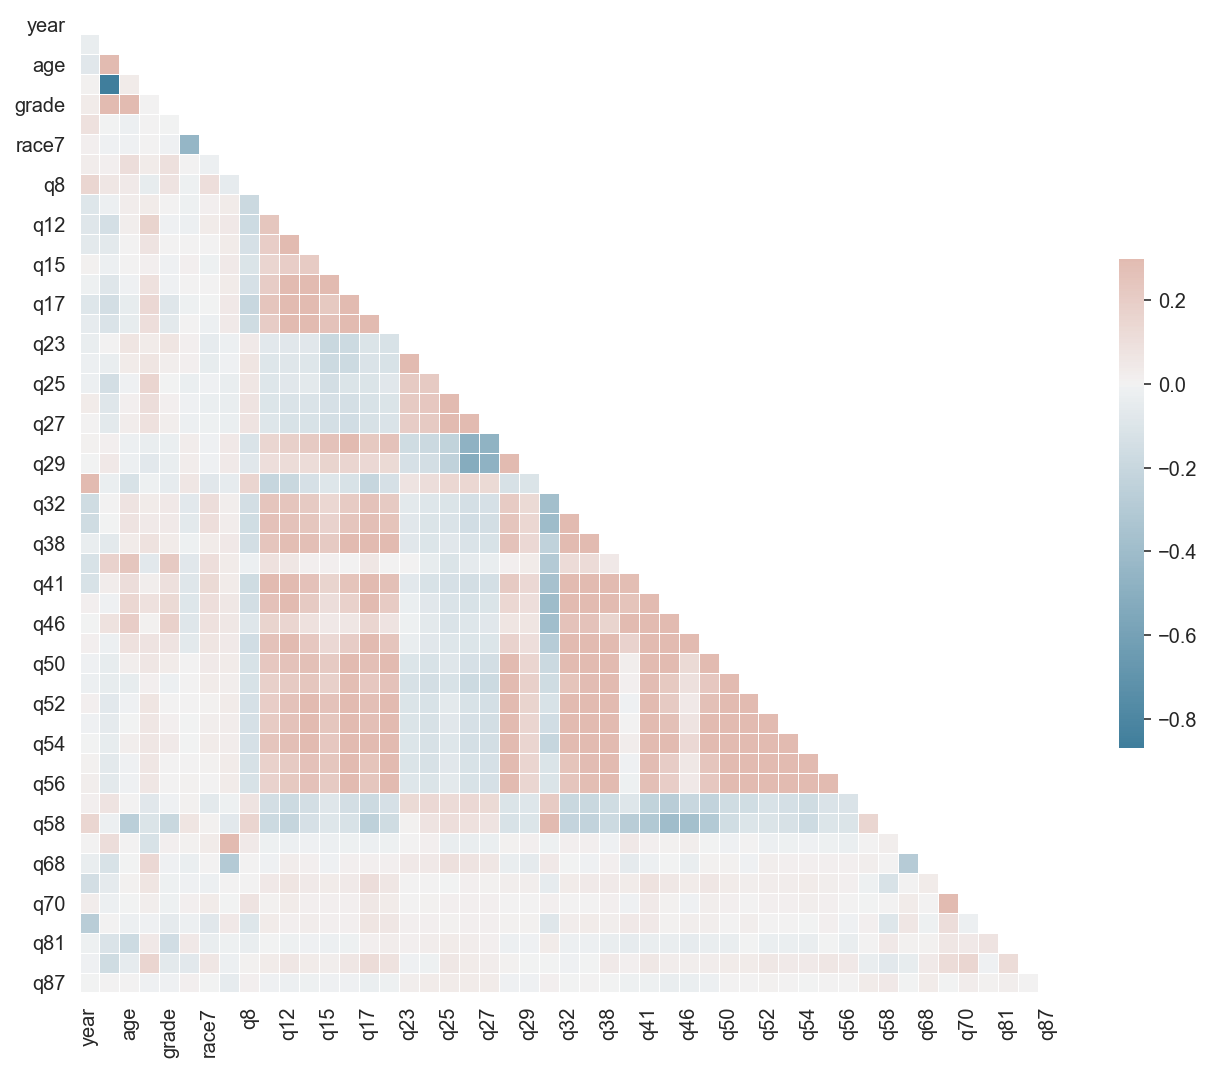

In [124]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [133]:
# More corr features are different enough to keep in for prediction
corr.q58.sort_values(ascending=False)

q58       1.000000
q30       0.319043
q8        0.161063
q57       0.152051
year      0.150702
q25       0.100872
q26       0.089574
q27       0.078168
q24       0.072497
race4     0.069932
q87       0.052482
q81       0.049112
q67       0.024326
race7     0.011499
q23       0.010303
q68       0.007106
q70      -0.000346
record   -0.025950
q82      -0.070838
bmi      -0.074171
q79      -0.091292
q15      -0.095139
q51      -0.100539
q55      -0.100692
q29      -0.101450
q56      -0.103885
sex      -0.105147
q52      -0.105476
q69      -0.116079
q28      -0.117312
q16      -0.121690
q53      -0.126381
q13      -0.137533
q50      -0.159013
q18      -0.162143
q54      -0.174973
q9       -0.183746
q38      -0.183791
grade    -0.197420
q12      -0.214196
q32      -0.221202
q33      -0.225683
q17      -0.251156
age      -0.258376
q40      -0.280138
q47      -0.304270
q41      -0.311020
q46      -0.375016
q45      -0.396710
Name: q58, dtype: float64

In [150]:
# Step 2: Fix Structural Errors
sex_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504249 entries, 3972 to 2226523
Data columns (total 49 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  504249 non-null  object 
 1   year      504249 non-null  int64  
 2   age       502725 non-null  float64
 3   sex       500875 non-null  float64
 4   grade     498152 non-null  float64
 5   race4     490031 non-null  float64
 6   race7     487885 non-null  float64
 7   bmi       406458 non-null  float64
 8   q8        389912 non-null  float64
 9   q9        351062 non-null  float64
 10  q12       478493 non-null  float64
 11  q13       456087 non-null  float64
 12  q15       482457 non-null  float64
 13  q16       485758 non-null  float64
 14  q17       477753 non-null  float64
 15  q18       378271 non-null  float64
 16  q23       286648 non-null  float64
 17  q24       237421 non-null  float64
 18  q25       437843 non-null  float64
 19  q26       493447 non-null  float64
 20  

In [144]:
sex_df.q9.unique()

array([ 2.,  1.,  5.,  3.,  4., nan])

<AxesSubplot:xlabel='year', ylabel='Count'>

Text(0.5, 1.0, 'year')

<AxesSubplot:xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age')

<AxesSubplot:xlabel='sex', ylabel='Count'>

Text(0.5, 1.0, 'sex')

<AxesSubplot:xlabel='grade', ylabel='Count'>

Text(0.5, 1.0, 'grade')

<AxesSubplot:xlabel='race4', ylabel='Count'>

Text(0.5, 1.0, 'race4')

<AxesSubplot:xlabel='race7', ylabel='Count'>

Text(0.5, 1.0, 'race7')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

Text(0.5, 1.0, 'bmi')

<AxesSubplot:xlabel='q8', ylabel='Count'>

Text(0.5, 1.0, 'q8')

<AxesSubplot:xlabel='q9', ylabel='Count'>

Text(0.5, 1.0, 'q9')

<AxesSubplot:xlabel='q12', ylabel='Count'>

Text(0.5, 1.0, 'q12')

<AxesSubplot:xlabel='q13', ylabel='Count'>

Text(0.5, 1.0, 'q13')

<AxesSubplot:xlabel='q15', ylabel='Count'>

Text(0.5, 1.0, 'q15')

<AxesSubplot:xlabel='q16', ylabel='Count'>

Text(0.5, 1.0, 'q16')

<AxesSubplot:xlabel='q17', ylabel='Count'>

Text(0.5, 1.0, 'q17')

<AxesSubplot:xlabel='q18', ylabel='Count'>

Text(0.5, 1.0, 'q18')

<AxesSubplot:xlabel='q23', ylabel='Count'>

Text(0.5, 1.0, 'q23')

<AxesSubplot:xlabel='q24', ylabel='Count'>

Text(0.5, 1.0, 'q24')

<AxesSubplot:xlabel='q25', ylabel='Count'>

Text(0.5, 1.0, 'q25')

<AxesSubplot:xlabel='q26', ylabel='Count'>

Text(0.5, 1.0, 'q26')

<AxesSubplot:xlabel='q27', ylabel='Count'>

Text(0.5, 1.0, 'q27')

<AxesSubplot:xlabel='q28', ylabel='Count'>

Text(0.5, 1.0, 'q28')

<AxesSubplot:xlabel='q29', ylabel='Count'>

Text(0.5, 1.0, 'q29')

<AxesSubplot:xlabel='q30', ylabel='Count'>

Text(0.5, 1.0, 'q30')

<AxesSubplot:xlabel='q32', ylabel='Count'>

Text(0.5, 1.0, 'q32')

<AxesSubplot:xlabel='q33', ylabel='Count'>

Text(0.5, 1.0, 'q33')

<AxesSubplot:xlabel='q38', ylabel='Count'>

Text(0.5, 1.0, 'q38')

<AxesSubplot:xlabel='q40', ylabel='Count'>

Text(0.5, 1.0, 'q40')

<AxesSubplot:xlabel='q41', ylabel='Count'>

Text(0.5, 1.0, 'q41')

<AxesSubplot:xlabel='q45', ylabel='Count'>

Text(0.5, 1.0, 'q45')

<AxesSubplot:xlabel='q46', ylabel='Count'>

Text(0.5, 1.0, 'q46')

<AxesSubplot:xlabel='q47', ylabel='Count'>

Text(0.5, 1.0, 'q47')

<AxesSubplot:xlabel='q50', ylabel='Count'>

Text(0.5, 1.0, 'q50')

<AxesSubplot:xlabel='q51', ylabel='Count'>

Text(0.5, 1.0, 'q51')

<AxesSubplot:xlabel='q52', ylabel='Count'>

Text(0.5, 1.0, 'q52')

<AxesSubplot:xlabel='q53', ylabel='Count'>

Text(0.5, 1.0, 'q53')

<AxesSubplot:xlabel='q54', ylabel='Count'>

Text(0.5, 1.0, 'q54')

<AxesSubplot:xlabel='q55', ylabel='Count'>

Text(0.5, 1.0, 'q55')

<AxesSubplot:xlabel='q56', ylabel='Count'>

Text(0.5, 1.0, 'q56')

<AxesSubplot:xlabel='q57', ylabel='Count'>

Text(0.5, 1.0, 'q57')

<AxesSubplot:xlabel='q58', ylabel='Count'>

Text(0.5, 1.0, 'q58')

<AxesSubplot:xlabel='q67', ylabel='Count'>

Text(0.5, 1.0, 'q67')

<AxesSubplot:xlabel='q68', ylabel='Count'>

Text(0.5, 1.0, 'q68')

<AxesSubplot:xlabel='q69', ylabel='Count'>

Text(0.5, 1.0, 'q69')

<AxesSubplot:xlabel='q70', ylabel='Count'>

Text(0.5, 1.0, 'q70')

<AxesSubplot:xlabel='q79', ylabel='Count'>

Text(0.5, 1.0, 'q79')

<AxesSubplot:xlabel='q81', ylabel='Count'>

Text(0.5, 1.0, 'q81')

<AxesSubplot:xlabel='q82', ylabel='Count'>

Text(0.5, 1.0, 'q82')

<AxesSubplot:xlabel='q87', ylabel='Count'>

Text(0.5, 1.0, 'q87')

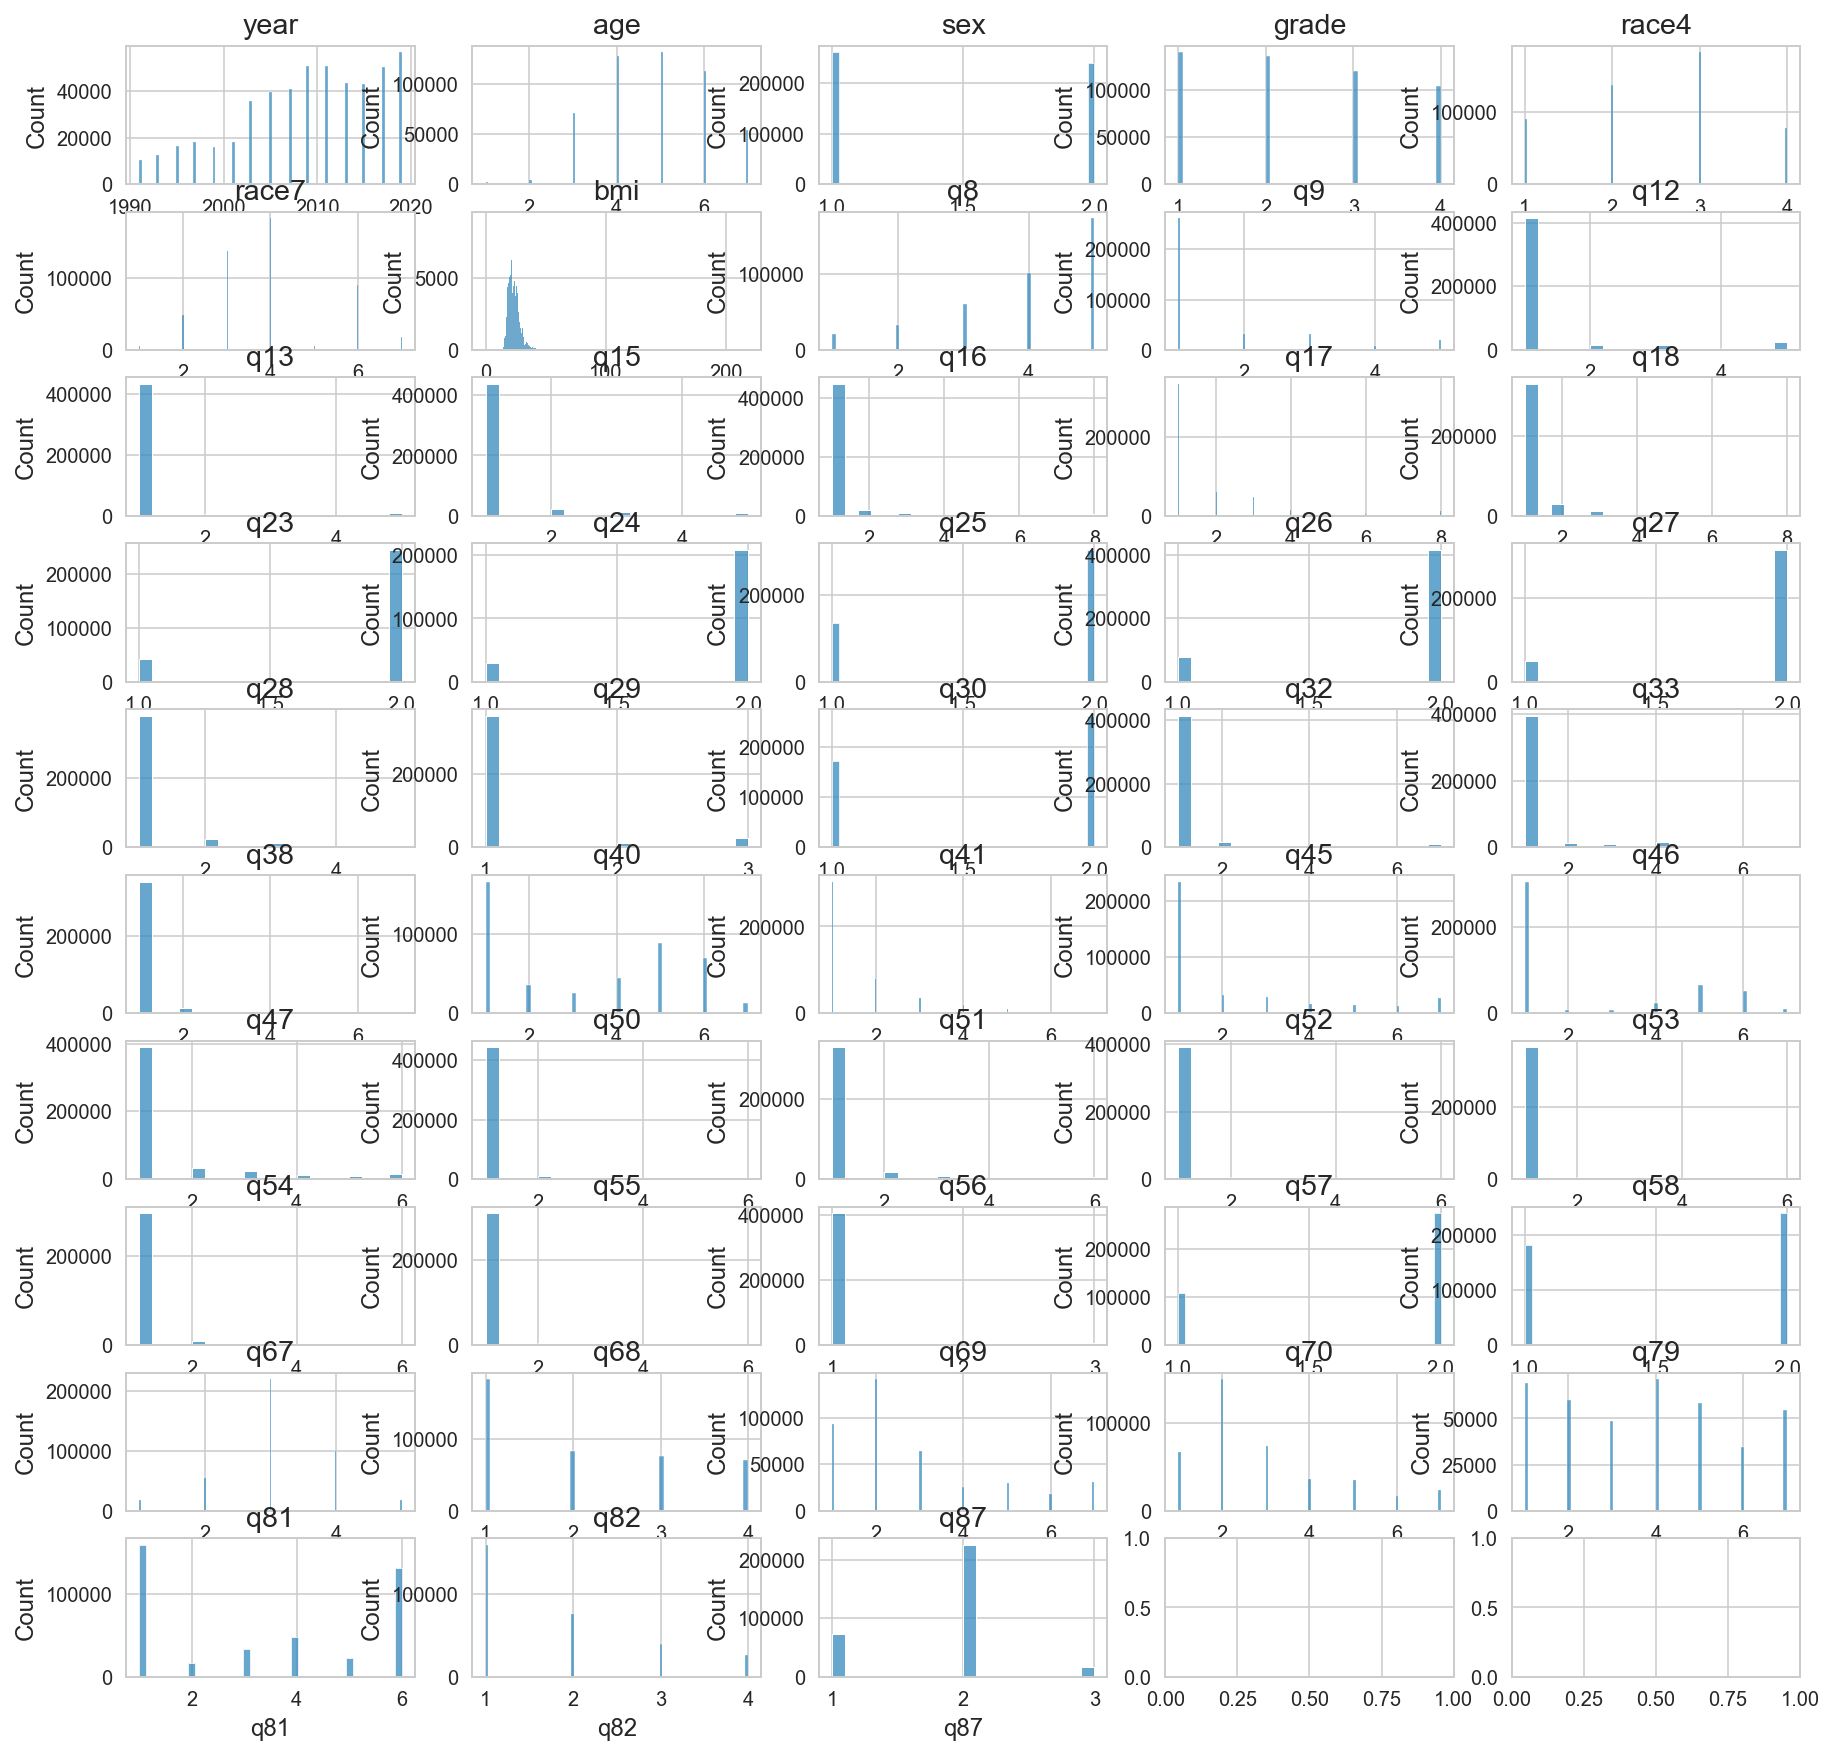

In [154]:
# Step 3: Filter Unwanted Outliers

fig, axs = plt.subplots(nrows = 10, ncols = 5)    # axes is 2d array (3x3)
axs = axs.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axs, sex_df.columns[1:]):
    sns.histplot(sex_df[col], ax = ax)
    ax.set_title(col);

In [156]:
# Step 4: Address Missing Values

In [159]:
# Drop features with more than 25% NaNs; 

sex_df.isnull().sum() / len(sex_df) * 100

sitename     0.000000
year         0.000000
age          0.302232
sex          0.669114
grade        1.209125
race4        2.819639
race7        3.245222
bmi         19.393395
q8          22.674710
q9          30.379237
q12          5.107794
q13          9.551234
q15          4.321674
q16          3.667038
q17          5.254547
q18         24.983292
q23         43.153482
q24         52.915921
q25         13.169287
q26          2.142196
q27         27.815028
q28         16.765328
q29         21.848928
q30         14.124371
q32          7.811815
q33         11.759865
q38         26.030790
q40         12.106320
q41         10.359763
q45         27.005904
q46          6.199120
q47          4.659404
q50          6.903732
q51         27.346609
q52         20.236232
q53         24.389736
q54         37.240728
q55         36.603146
q56         17.355315
q57         24.255874
q58         16.403602
q67         18.307424
q68         17.600432
q69         19.698800
q70         19.879266
q79       

In [160]:
to_drop_nans_2 = ['q9', 'q18', 'q23', 'q24', 'q27', 
                 'q38', 'q45', 'q51', 'q52', 'q53', 
                 'q54', 'q55', 'q56', 'q57', 'q67', 
                 'q68', 'q69', 'q70', 'q82', 'q87']

In [161]:
sex_df.drop(columns=to_drop_nans_2, inplace=True)

In [162]:
sex_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504249 entries, 3972 to 2226523
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  504249 non-null  object 
 1   year      504249 non-null  int64  
 2   age       502725 non-null  float64
 3   sex       500875 non-null  float64
 4   grade     498152 non-null  float64
 5   race4     490031 non-null  float64
 6   race7     487885 non-null  float64
 7   bmi       406458 non-null  float64
 8   q8        389912 non-null  float64
 9   q12       478493 non-null  float64
 10  q13       456087 non-null  float64
 11  q15       482457 non-null  float64
 12  q16       485758 non-null  float64
 13  q17       477753 non-null  float64
 14  q25       437843 non-null  float64
 15  q26       493447 non-null  float64
 16  q28       419710 non-null  float64
 17  q29       394076 non-null  float64
 18  q30       433027 non-null  float64
 19  q32       464858 non-null  float64
 20  

In [163]:
sex_df.year.value_counts()

2019    56770
2011    51038
2009    50964
2017    50490
2013    43482
2015    43286
2007    41173
2005    39859
2003    35692
1997    18192
2001    18052
1995    16207
1999    15990
1993    12650
1991    10404
Name: year, dtype: int64

In [165]:
# Just keep 2009 - 2019

sex_df = sex_df[sex_df['year']>=2009]

In [166]:
sex_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296030 entries, 3961 to 2226523
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  296030 non-null  object 
 1   year      296030 non-null  int64  
 2   age       295009 non-null  float64
 3   sex       293575 non-null  float64
 4   grade     291733 non-null  float64
 5   race4     284810 non-null  float64
 6   race7     284810 non-null  float64
 7   bmi       266288 non-null  float64
 8   q8        182785 non-null  float64
 9   q12       275188 non-null  float64
 10  q13       261271 non-null  float64
 11  q15       285562 non-null  float64
 12  q16       288658 non-null  float64
 13  q17       279400 non-null  float64
 14  q25       288586 non-null  float64
 15  q26       288327 non-null  float64
 16  q28       244354 non-null  float64
 17  q29       222915 non-null  float64
 18  q30       239885 non-null  float64
 19  q32       271177 non-null  float64
 20  

In [170]:
sex = sex_df.dropna(subset=['q58'])

In [171]:
sex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235980 entries, 7354 to 2226523
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sitename  235980 non-null  object 
 1   year      235980 non-null  int64  
 2   age       235371 non-null  float64
 3   sex       234981 non-null  float64
 4   grade     233484 non-null  float64
 5   race4     228751 non-null  float64
 6   race7     228751 non-null  float64
 7   bmi       215210 non-null  float64
 8   q8        147368 non-null  float64
 9   q12       220991 non-null  float64
 10  q13       211469 non-null  float64
 11  q15       228243 non-null  float64
 12  q16       233261 non-null  float64
 13  q17       224112 non-null  float64
 14  q25       233282 non-null  float64
 15  q26       232842 non-null  float64
 16  q28       201038 non-null  float64
 17  q29       188064 non-null  float64
 18  q30       198716 non-null  float64
 19  q32       225701 non-null  float64
 20  

In [ ]:
# Impute missing values with 